In [1]:
library(limma)
library(Biobase)
library(dplyr)
library(ggplot2)
library(magrittr)
library(ggrepel)

Warning message:
“package ‘limma’ was built under R version 4.3.3”
Warning message:
“package ‘Biobase’ was built under R version 4.3.3”
Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:limma’:

    plotMA


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'c

In [66]:
#dataload
data1 <- read.csv('/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/THE_github/extdata/mrna20k_emci.csv', row.names = 1)
rownames(data1) <- data1$index
data1 <- data1[, -c(1)]
data_2 <- t(data1)


subtype_info <- read.csv("/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/THE_github/extdata/cn_emci_lmci_ad_clin_pseudotime.csv", header = TRUE)
table(subtype_info$SNF)
name_emci1 <- subtype_info$PID[which(subtype_info$SNF == "emcisubtype1")]
name_emci2 <- subtype_info$PID[which(subtype_info$SNF == "emcisubtype2")]

# Add cell-type deconvolution results
mrna_emci_deconv <- read.delim("/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/THE_github/extdata/mrna_emci_deconv.tsv")
row.names(mrna_emci_deconv) <- mrna_emci_deconv$Cell.Type

mrna_emci_deconv_sig <- mrna_emci_deconv[, c(
  "T.cells.CD8", "T.cells.CD4.naive", "T.cells.CD4.memory.activated",
  "T.cells.CD4.memory.resting", "Neutrophils", "Eosinophils", "Monocytes",
  "NK.cells.resting", "Macrophages.M2"
)]

# Assign groups
mrna_emci_deconv_sig <- as.data.frame(mrna_emci_deconv_sig)
mrna_emci_deconv_sig$groups <- "emci_1"

for (i in 1:nrow(mrna_emci_deconv_sig)) {
  if (row.names(mrna_emci_deconv_sig)[i] %in% name_emci2) {
    mrna_emci_deconv_sig$groups[i] <- "emci_2"
  }
}

# Scale
ind <- sapply(mrna_emci_deconv_sig, is.numeric)
f <- function(x) { scale(x, center = FALSE) }
mrna_emci_deconv_sig[ind] <- lapply(mrna_emci_deconv_sig[ind], f)



full_clinical <- read.csv('/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/THE_github/extdata/cn_emci_lmci_ad_clin_pseudotime.csv', row.names = 1)
pd <- merge(mrna_emci_deconv_sig, full_clinical[, c('AGE', 'PTGENDER', 'PTRACCAT')], by = 0)
rownames(pd) <- pd$Row.names
pd <- pd[, -c(1)]
pd$PTGENDER <- as.character(pd$PTGENDER)
pd$PTRACCAT <- as.character(pd$PTRACCAT)

formula <- paste0(names(pd), collapse = ' + ')
formula <- paste0("~", formula)

formula <- formula(formula)
design2 <- model.matrix(formula, data = pd)
formula

p_emci_after = emci_volcano_func(design2,pd,note='After',coef_dim=11)

formula2 = '~ groups + AGE + PTGENDER + PTRACCAT'
pd2 = pd[,c('groups','AGE','PTGENDER','PTRACCAT')]

formula2 <- formula(formula2)
design3 <- model.matrix(formula2, data = pd2)
formula2

p_emci_before = emci_volcano_func(design3,pd2,note='Before',coef_dim=2)


          AD           CN emcisubtype1 emcisubtype2 lmcisubtype1 lmcisubtype2 
         339          534          108           93           85          115 

~T.cells.CD8 + T.cells.CD4.naive + T.cells.CD4.memory.activated + 
    T.cells.CD4.memory.resting + Neutrophils + Eosinophils + 
    Monocytes + NK.cells.resting + Macrophages.M2 + groups + 
    AGE + PTGENDER + PTRACCAT

~groups + AGE + PTGENDER + PTRACCAT

Warning message:
“Removed 19778 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”
Warning message:
“ggrepel: 233 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“Removed 19874 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”
Warning message:
“ggrepel: 137 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


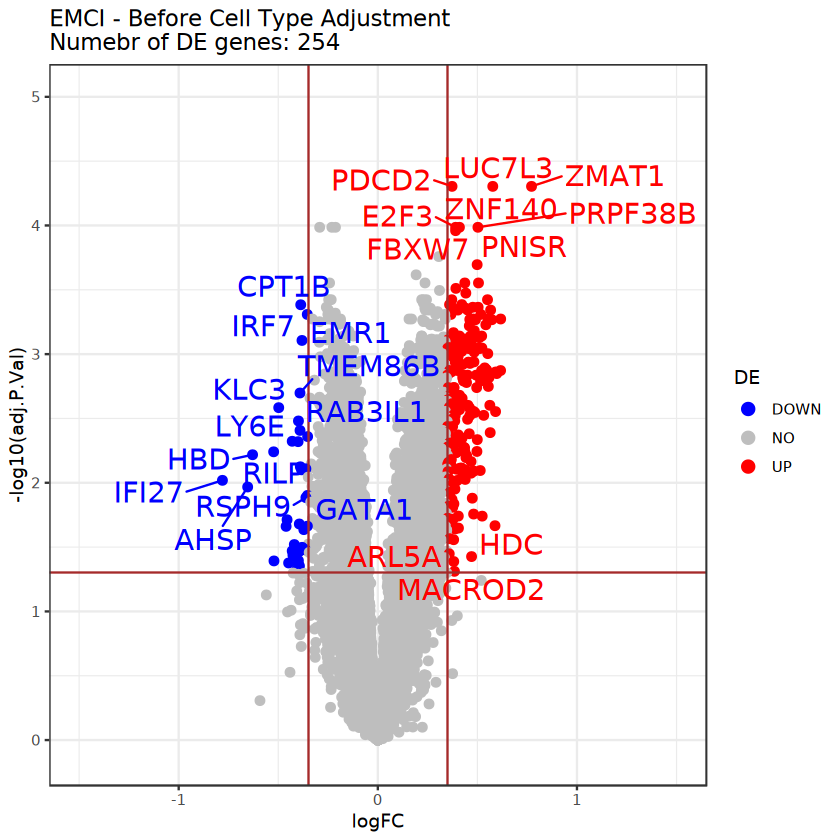

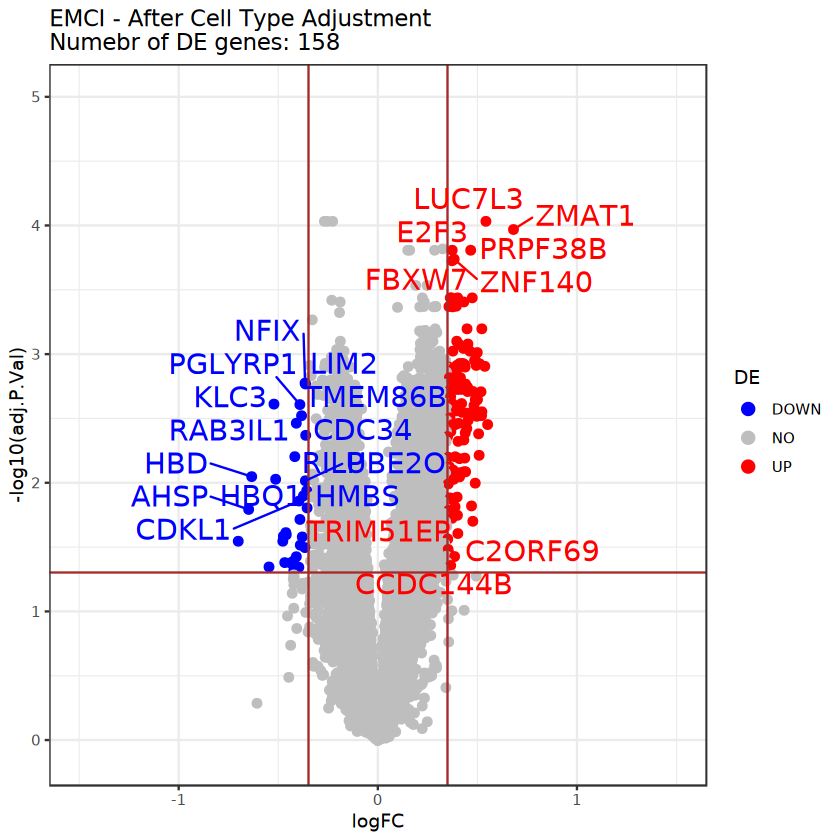

In [ ]:
p_emci_before
p_emci_after


In [59]:
library(limma)
library(Biobase)
library(dplyr)
library(ggplot2)
library(magrittr)
library(ggrepel)

#dataload
data1 <- read.csv('/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/THE_github/extdata/mrna20k_lmci.csv', row.names = 1)
rownames(data1) <- data1$index
data1 <- data1[, -c(1)]
data_2 <- t(data1)


subtype_info <- read.csv("/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/THE_github/extdata/cn_emci_lmci_ad_clin_pseudotime.csv", header = TRUE)
table(subtype_info$SNF)
name_lmci1 <- subtype_info$PID[which(subtype_info$SNF == "lmcisubtype1")]
name_lmci2 <- subtype_info$PID[which(subtype_info$SNF == "lmcisubtype2")]

# Add cell-type deconvolution results
mrna_lmci_deconv <- read.delim("/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/THE_github/extdata/mrna_lmci_deconv.tsv")
row.names(mrna_lmci_deconv) <- mrna_lmci_deconv$Cell.Type

mrna_lmci_deconv_sig <- mrna_lmci_deconv[, c(
  "T.cells.CD8", "T.cells.CD4.naive", "T.cells.CD4.memory.activated",
  "T.cells.CD4.memory.resting", "Neutrophils", "Eosinophils", "Monocytes",
  "NK.cells.resting", "Macrophages.M2"
)]


# Assign groups
mrna_lmci_deconv_sig <- as.data.frame(mrna_lmci_deconv_sig)
mrna_lmci_deconv_sig$groups <- "lmci_1"

for (i in 1:nrow(mrna_lmci_deconv_sig)) {
  if (row.names(mrna_lmci_deconv_sig)[i] %in% name_lmci2) {
    mrna_lmci_deconv_sig$groups[i] <- "lmci_2"
  }
}

# Scale
ind <- sapply(mrna_lmci_deconv_sig, is.numeric)
f <- function(x) { scale(x, center = FALSE) }
mrna_lmci_deconv_sig[ind] <- lapply(mrna_lmci_deconv_sig[ind], f)



full_clinical <- read.csv('/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/THE_github/extdata/cn_emci_lmci_ad_clin_pseudotime.csv', row.names = 1)
pd <- merge(mrna_lmci_deconv_sig, full_clinical[, c('AGE', 'PTGENDER', 'PTRACCAT')], by = 0)
rownames(pd) <- pd$Row.names
pd <- pd[, -c(1)]
pd$PTGENDER <- as.character(pd$PTGENDER)
pd$PTRACCAT <- as.character(pd$PTRACCAT)



formula <- paste0(names(pd), collapse = ' + ')
formula <- paste0("~", formula)

formula <- formula(formula)
design2 <- model.matrix(formula, data = pd)
formula

p_lmci_after = lmci_volcano_func(data_in = data_2, design_in = design2, pd_in = pd, note='After',coef_dim=11)

formula2 = '~ groups + AGE + PTGENDER + PTRACCAT'
pd2 = pd[,c('groups','AGE','PTGENDER','PTRACCAT')]

formula2 <- formula(formula2)
design3 <- model.matrix(formula2, data = pd2)
formula2

p_lmci_before = lmci_volcano_func(data_in = data_2, design_in = design3, pd_in = pd2, note='Before',coef_dim=2)



          AD           CN emcisubtype1 emcisubtype2 lmcisubtype1 lmcisubtype2 
         339          534          108           93           85          115 

~T.cells.CD8 + T.cells.CD4.naive + T.cells.CD4.memory.activated + 
    T.cells.CD4.memory.resting + Neutrophils + Eosinophils + 
    Monocytes + NK.cells.resting + Macrophages.M2 + groups + 
    AGE + PTGENDER + PTRACCAT

~groups + AGE + PTGENDER + PTRACCAT

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 19766 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”
Warning message:
“ggrepel: 242 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“Removed 19990 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”
Warning message:
“ggrepel: 33 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


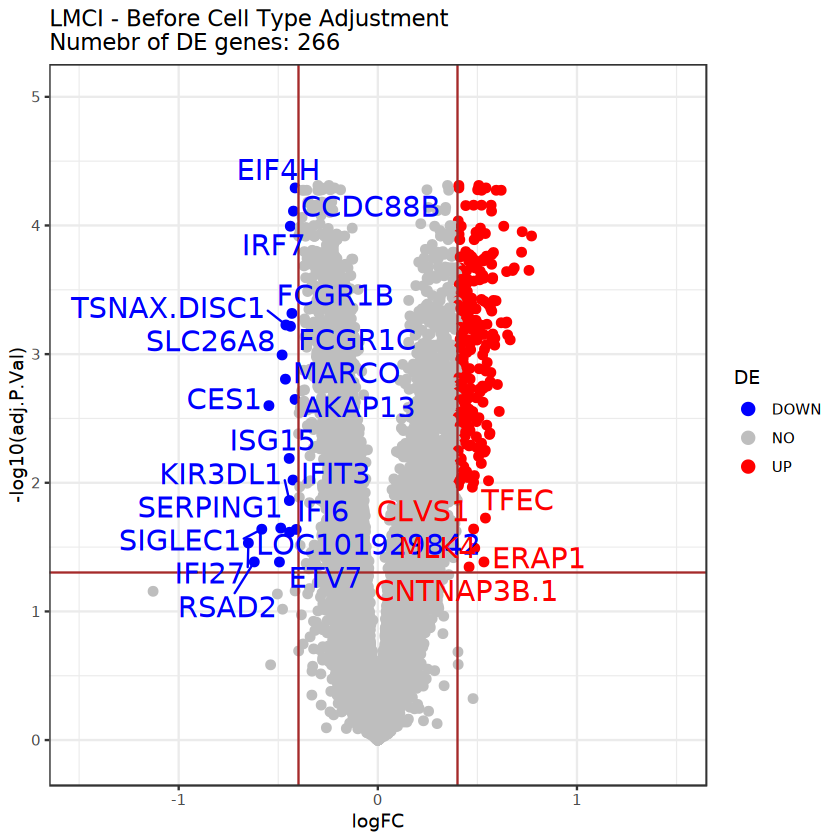

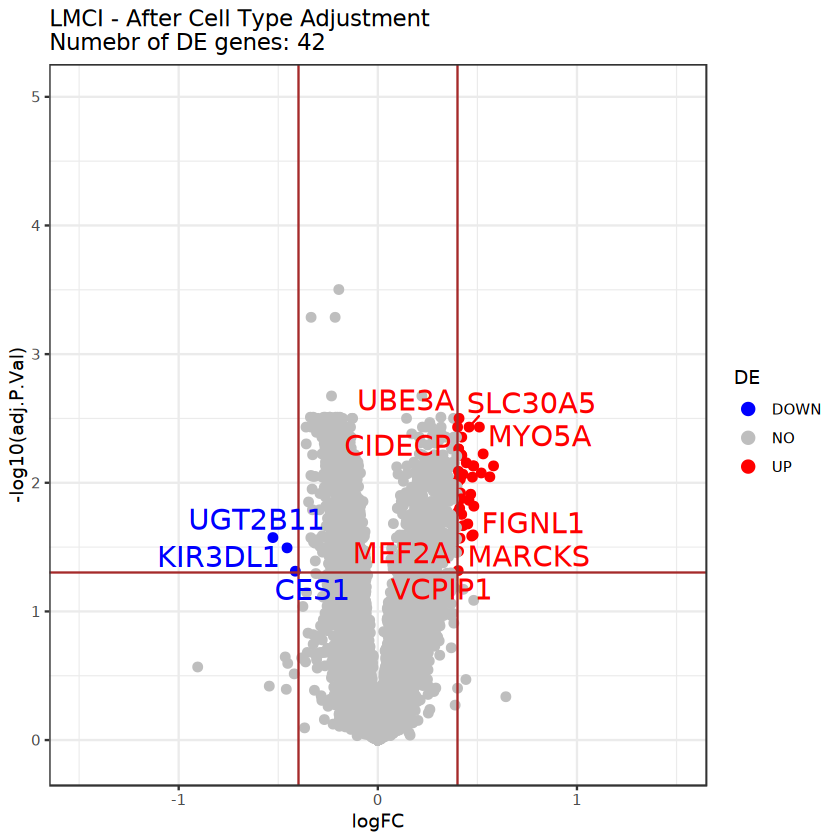

In [60]:
p_lmci_before
p_lmci_after

In [71]:
save(p_emci_before, p_emci_after, p_lmci_before, p_lmci_after,file = 'volcano_plots.rda')

In [69]:
library(ggpubr)
png('volcano_EMCI_LMCI_before_after.png',height = 10,width=12,unit='in',res=300)
ggarrange(
  p_emci_before, p_emci_after, p_lmci_before, p_lmci_after,
  ncol = 2, nrow = 2,
  labels = c("C", "D",'E','F'),
  common.legend = FALSE,
  align = "v"
)
dev.off()

Warning message:
“Removed 19778 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”
Warning message:
“Removed 19874 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 19766 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”
Warning message:
“Removed 19990 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”
Warning message:
“ggrepel: 243 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 149 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 246 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 38 unlabeled data points (too many overlaps). Consider

png 
  2

In [65]:
emci_volcano_func = function(design, pd, note='Before',coef_dim=2){
	fit1 <- lmFit(data_2[, rownames(pd)], design)
	fit2 <- eBayes(fit1)

	#limma_result_fit <- topTable(fit2, coef = 11, n = Inf)
	limma_result_fit <- topTable(fit2, coef = coef_dim, n = Inf)
	limma_result_fit$gene_symbol <- row.names(limma_result_fit)

	fold_cutoff <- 0.35
	limma_result_fit$diffexpressed <- "NO"
	limma_result_fit$diffexpressed[limma_result_fit$logFC > fold_cutoff & limma_result_fit$adj.P.Val < 0.05] <- "UP"
	limma_result_fit$diffexpressed[limma_result_fit$logFC < -fold_cutoff & limma_result_fit$adj.P.Val < 0.05] <- "DOWN"

	# Label DE genes
	limma_result_fit$delabel <- NA
	limma_result_fit$delabel[limma_result_fit$diffexpressed != "NO"] <- limma_result_fit$gene_symbol[limma_result_fit$diffexpressed != "NO"]

	# Filter DE genes
	limma_DE <- limma_result_fit[which(limma_result_fit$diffexpressed != "NO"), ]

	p_out = ggplot(data = limma_result_fit, aes(x = logFC, y = -log10(adj.P.Val), col = diffexpressed)) +
	  geom_point(size = 2) +
	  theme_minimal() +
	  scale_color_manual(breaks = c("DOWN", "NO", "UP"), values = c("blue", "grey", "red")) +
	  guides(color = guide_legend(title = "DE", override.aes = list(size = 3))) +
	  geom_vline(xintercept = c(-fold_cutoff, fold_cutoff), col = "brown") +
	  geom_hline(yintercept = -log10(0.05), col = "brown") +
	  xlim(-1.5, 1.5) + ylim(-0.1, 5) +
	  theme(
	    axis.title = element_text(size = 15), axis.text = element_text(size = 15),
	    legend.title = element_text(size = 15), legend.text = element_text(size = 15)
	  ) +
	  theme_bw()+
	  geom_text_repel(aes(label = delabel), size = 6, max.overlaps = 15)+
	  ggtitle(paste0('EMCI - ',note,' Cell Type Adjustment\nNumebr of DE genes: ',dim(limma_DE)[1]))
  return(p_out)
}

In [58]:
lmci_volcano_func = function(data_in, design_in, pd_in, note='Before',coef_dim=2){
	fit1 <- lmFit(data_in[, rownames(pd_in)], design_in)
	fit2 <- eBayes(fit1)

	#limma_result_fit <- topTable(fit2, coef = 11, n = Inf)
	limma_result_fit <- topTable(fit2, coef = coef_dim, n = Inf)
	limma_result_fit$gene_symbol <- row.names(limma_result_fit)

	fold_cutoff <- 0.4
	limma_result_fit$diffexpressed <- "NO"
	limma_result_fit$diffexpressed[limma_result_fit$logFC > fold_cutoff & limma_result_fit$adj.P.Val < 0.05] <- "UP"
	limma_result_fit$diffexpressed[limma_result_fit$logFC < -fold_cutoff & limma_result_fit$adj.P.Val < 0.05] <- "DOWN"

	# Label DE genes
	limma_result_fit$delabel <- NA
	limma_result_fit$delabel[limma_result_fit$diffexpressed != "NO"] <- limma_result_fit$gene_symbol[limma_result_fit$diffexpressed != "NO"]

	# Filter DE genes
	limma_DE <- limma_result_fit[which(limma_result_fit$diffexpressed != "NO"), ]

	p_out = ggplot(data = limma_result_fit, aes(x = logFC, y = -log10(adj.P.Val), col = diffexpressed)) +
	  geom_point(size = 2) +
	  theme_minimal() +
	  scale_color_manual(breaks = c("DOWN", "NO", "UP"), values = c("blue", "grey", "red")) +
	  guides(color = guide_legend(title = "DE", override.aes = list(size = 3))) +
	  geom_vline(xintercept = c(-fold_cutoff, fold_cutoff), col = "brown") +
	  geom_hline(yintercept = -log10(0.05), col = "brown") +
	  xlim(-1.5, 1.5) + ylim(-0.1, 5) +
	  theme(
	    axis.title = element_text(size = 15), axis.text = element_text(size = 15),
	    legend.title = element_text(size = 15), legend.text = element_text(size = 15)
	  ) +
	  theme_bw()+
	  geom_text_repel(aes(label = delabel), size = 6, max.overlaps = 15)+
	  ggtitle(paste0('LMCI - ',note,' Cell Type Adjustment\nNumebr of DE genes: ',dim(limma_DE)[1]))
  return(p_out)
}